In [1]:
# importing the all main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# loading the dataset
df = pd.read_csv(r"C:\Users\rajpu\OneDrive\Desktop\real-time_translation_app\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [10]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [12]:
# splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [15]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [19]:
x_train.shape

(614, 8)

In [20]:
x_test.shape

(154, 8)

In [22]:
# now creating neural network model
model = Sequential()
model.add(Dense(120,activation = 'relu',input_dim = 8))

model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ["accuracy"])

In [32]:
 history = model.fit(x_train,y_train,epochs = 30,batch_size = 32,validation_data = (x_test,y_test))

Epoch 1/30
20/20 [==============================] - 0s 6ms/step - loss: 0.3371 - accuracy: 0.8616 - val_loss: 0.4871 - val_accuracy: 0.8117
Epoch 2/30
20/20 [==============================] - 0s 4ms/step - loss: 0.3362 - accuracy: 0.8453 - val_loss: 0.4850 - val_accuracy: 0.7987
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8502 - val_loss: 0.4843 - val_accuracy: 0.7922
Epoch 4/30
20/20 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8583 - val_loss: 0.4924 - val_accuracy: 0.8052
Epoch 5/30
20/20 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.8583 - val_loss: 0.4888 - val_accuracy: 0.8052
Epoch 6/30
20/20 [==============================] - 0s 4ms/step - loss: 0.3362 - accuracy: 0.8599 - val_loss: 0.4913 - val_accuracy: 0.8052
Epoch 7/30
20/20 [==============================] - 0s 4ms/step - loss: 0.3353 - accuracy: 0.8550 - val_loss: 0.4932 - val_accuracy: 0.8052
Epoch 8/30
20/20 [==

In [33]:
history.history

{'loss': [0.3371390998363495,
  0.3362014591693878,
  0.33840903639793396,
  0.3346061706542969,
  0.3347366452217102,
  0.33617472648620605,
  0.33533620834350586,
  0.33553633093833923,
  0.33466318249702454,
  0.3337385058403015,
  0.3323678970336914,
  0.3320758044719696,
  0.3305983245372772,
  0.3302574157714844,
  0.3305179178714752,
  0.33034321665763855,
  0.328464150428772,
  0.3284275531768799,
  0.32901817560195923,
  0.3297743499279022,
  0.32880860567092896,
  0.32727715373039246,
  0.3259284198284149,
  0.32644549012184143,
  0.3261115252971649,
  0.32473787665367126,
  0.32700762152671814,
  0.32365962862968445,
  0.32346490025520325,
  0.32510876655578613],
 'accuracy': [0.861563503742218,
  0.8452768921852112,
  0.8501628637313843,
  0.8583061695098877,
  0.8583061695098877,
  0.8599348664283752,
  0.8550488352775574,
  0.8583061695098877,
  0.8517915606498718,
  0.8648208379745483,
  0.8697068691253662,
  0.8550488352775574,
  0.8631922006607056,
  0.8599348664283752

In [34]:
history.history["val_accuracy"]

[0.8116883039474487,
 0.798701286315918,
 0.7922077775001526,
 0.8051947951316833,
 0.8051947951316833,
 0.8051947951316833,
 0.8051947951316833,
 0.798701286315918,
 0.798701286315918,
 0.8051947951316833,
 0.7922077775001526,
 0.8051947951316833,
 0.798701286315918,
 0.8051947951316833,
 0.8116883039474487,
 0.798701286315918,
 0.8051947951316833,
 0.8051947951316833,
 0.8181818127632141,
 0.7922077775001526,
 0.8051947951316833,
 0.8051947951316833,
 0.8116883039474487,
 0.798701286315918,
 0.8181818127632141,
 0.8051947951316833,
 0.798701286315918,
 0.8051947951316833,
 0.798701286315918,
 0.8051947951316833]

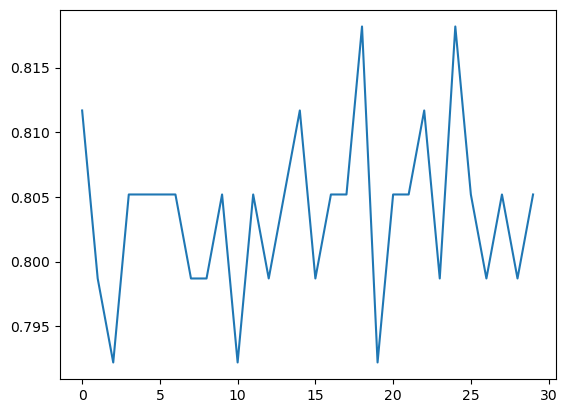

In [35]:
plt.plot(history.history["val_accuracy"])

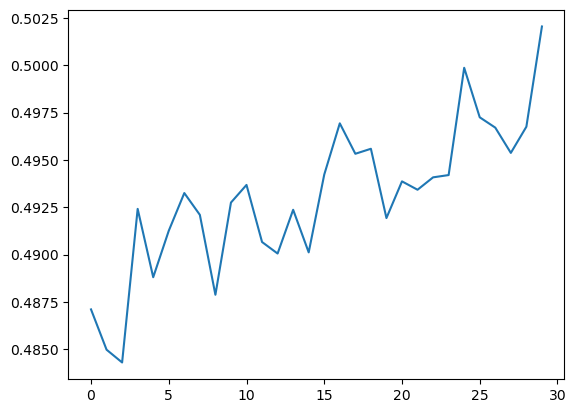

In [36]:
plt.plot(history.history["val_loss"])

In [31]:
history.history["val_loss"]

[0.4617519676685333,
 0.46411964297294617,
 0.46041226387023926,
 0.4593264162540436,
 0.46031653881073,
 0.4613090753555298,
 0.4632859230041504,
 0.4658648371696472,
 0.46335527300834656,
 0.46567559242248535,
 0.4635353088378906,
 0.4649931788444519,
 0.4646146595478058,
 0.46520817279815674,
 0.4643983244895935,
 0.4668991267681122,
 0.4667281210422516,
 0.46911001205444336,
 0.466377317905426,
 0.46477487683296204,
 0.4668419063091278,
 0.46559008955955505,
 0.4656613767147064,
 0.46310389041900635,
 0.4695606827735901,
 0.4692503809928894,
 0.4693053960800171,
 0.4669727087020874,
 0.46837377548217773,
 0.4691425561904907,
 0.4711458384990692,
 0.4686698317527771,
 0.46932125091552734,
 0.469971239566803,
 0.46942177414894104,
 0.4708516597747803,
 0.4702685475349426,
 0.469104528427124,
 0.4706059694290161,
 0.4703385531902313,
 0.47080567479133606,
 0.4713079333305359,
 0.4723091721534729,
 0.4704239070415497,
 0.4729898273944855,
 0.4711563289165497,
 0.4700883626937866,
 0.47

# now doing keras tuning


In [37]:
import kerastuner as kt

C:\Users\rajpu\AppData\Local\Temp\ipykernel_14648\1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [47]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32,activation = 'relu',input_dim = 8))
    model.add(Dense(1,activation = 'sigmoid'))
    
    optimizer = hp.Choice('optimizer',values = ['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy',metrics = ['accuracy'])
    
    
    return model

In [48]:
tuner = kt.RandomSearch(build_model,
                       objective = 'val_accuracy',
                       max_trials = 5)

Reloading Tuner from .\untitled_project\tuner0.json


In [49]:
tuner.search(x_train,y_train,epochs = 6,validation_data = (x_test,y_test))

In [51]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [53]:
# here i did hyperparameter tuning on four optimizers 
# and after doing hyperparamter tuning i am getting best result on rmsprop
model= tuner.get_best_models(num_models = 1)[0]

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# again training the model
history = model.fit(x_train,y_train,epochs = 50,validation_data = (x_test,y_test))

Epoch 1/50
20/20 [==============================] - 0s 8ms/step - loss: 0.5365 - accuracy: 0.7508 - val_loss: 0.5178 - val_accuracy: 0.7597
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7638 - val_loss: 0.5032 - val_accuracy: 0.7792
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5022 - accuracy: 0.7622 - val_loss: 0.4917 - val_accuracy: 0.7727
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7720 - val_loss: 0.4838 - val_accuracy: 0.7662
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4823 - accuracy: 0.7704 - val_loss: 0.4789 - val_accuracy: 0.7792
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7704 - val_loss: 0.4753 - val_accuracy: 0.7857
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.7720 - val_loss: 0.4738 - val_accuracy: 0.7792
Epoch 8/50
20/20 [==

In [56]:
history

In [57]:
history.history

{'loss': [0.5364765524864197,
  0.5163212418556213,
  0.5021982789039612,
  0.4910219609737396,
  0.4822874665260315,
  0.4763052761554718,
  0.4721340239048004,
  0.46852731704711914,
  0.46582716703414917,
  0.4634383022785187,
  0.46173930168151855,
  0.4595794081687927,
  0.4583049416542053,
  0.4569828510284424,
  0.456061989068985,
  0.455098956823349,
  0.4538421034812927,
  0.4529910981655121,
  0.4524439573287964,
  0.45131659507751465,
  0.4503958523273468,
  0.4499460458755493,
  0.44873785972595215,
  0.44867968559265137,
  0.4477297365665436,
  0.44718867540359497,
  0.44619035720825195,
  0.4458470940589905,
  0.44495463371276855,
  0.4445192813873291,
  0.44387274980545044,
  0.4432103633880615,
  0.44250065088272095,
  0.4420836567878723,
  0.4419306218624115,
  0.4411408007144928,
  0.44066837430000305,
  0.43981823325157166,
  0.43966376781463623,
  0.4389813542366028,
  0.43825334310531616,
  0.43789613246917725,
  0.43738865852355957,
  0.4368284046649933,
  0.43641

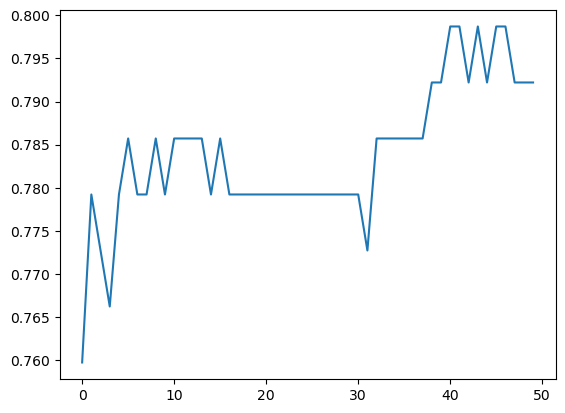

In [58]:
plt.plot(history.history["val_accuracy"])
# this i am getting with rmsprop as optimizer

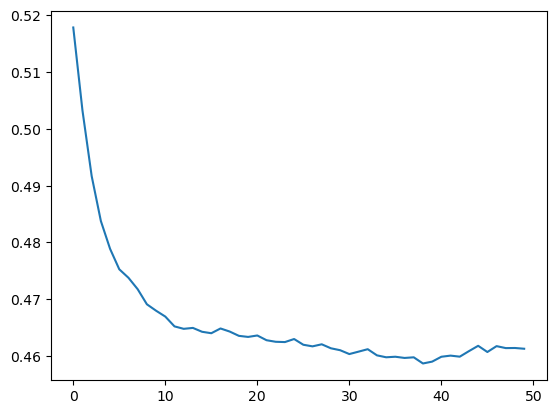

In [59]:
plt.plot(history.history["val_loss"])
# this garph is with rmsprop as optimizer

# now tuning the number of neurons in layers

In [65]:
def build_model(hp):
    model = Sequential()
    units = hp.Int('units',min_value = 8,max_value = 128,step = 8)
    
    model.add(Dense(units = units,activation = 'relu',input_dim = 8))
    model.add(Dense(1,activation = 'sigmoid'))
    
    model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ["accuracy"])
    
    return model

In [67]:
# creating an object having name tuner
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 5,
                        directory = 'my_dir',
                        project_name = 'Data'
                       )

In [68]:
tuner.search(x_train,y_train,epochs = 5,validation_data = (x_test,y_test))

Trial 5 Complete [00h 00m 01s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.798701286315918
Total elapsed time: 00h 00m 06s


In [69]:
tuner.get_best_hyperparameters()[0].values

{'units': 96}

In [70]:
model = tuner.get_best_models(num_models = 1)[0]

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                864       
                                                                 
 dense_1 (Dense)             (None, 1)                 97        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
history = model.fit(x_train,y_train,epochs = 100,validation_data = (x_test,y_test))

Epoch 1/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5021 - accuracy: 0.7590 - val_loss: 0.4904 - val_accuracy: 0.7922
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.7655 - val_loss: 0.4765 - val_accuracy: 0.7792
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.7720 - val_loss: 0.4712 - val_accuracy: 0.7727
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7752 - val_loss: 0.4652 - val_accuracy: 0.7922
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.7752 - val_loss: 0.4627 - val_accuracy: 0.7987
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.7752 - val_loss: 0.4622 - val_accuracy: 0.7987
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4558 - accuracy: 0.7752 - val_loss: 0.4614 - val_accuracy: 0.7987
Epoch 8/100
2

In [74]:
history.history

{'loss': [0.5021477341651917,
  0.4862498342990875,
  0.4746841788291931,
  0.4678139090538025,
  0.46296268701553345,
  0.45853251218795776,
  0.455782413482666,
  0.45378372073173523,
  0.4508014917373657,
  0.4496378004550934,
  0.4485904574394226,
  0.4464542865753174,
  0.44515952467918396,
  0.4442687928676605,
  0.4439238905906677,
  0.44205737113952637,
  0.441556841135025,
  0.4408835172653198,
  0.43954890966415405,
  0.4382091164588928,
  0.43751823902130127,
  0.43682345747947693,
  0.435774028301239,
  0.4347921311855316,
  0.43421345949172974,
  0.4333481192588806,
  0.4322762191295624,
  0.4316282868385315,
  0.4306788146495819,
  0.4311252534389496,
  0.42977190017700195,
  0.4287574589252472,
  0.42846137285232544,
  0.42733487486839294,
  0.42666736245155334,
  0.42647260427474976,
  0.4261559247970581,
  0.4256347715854645,
  0.42447903752326965,
  0.42448118329048157,
  0.42356225848197937,
  0.42259418964385986,
  0.422842413187027,
  0.4216802716255188,
  0.420606

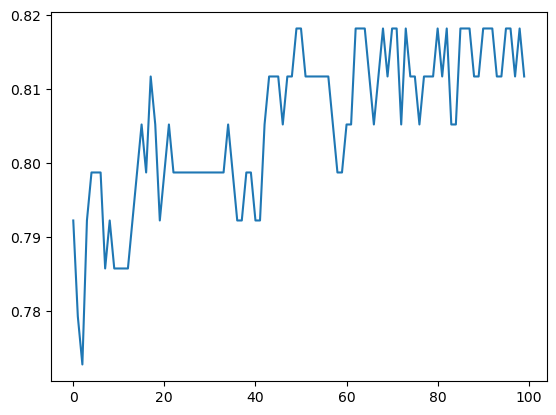

In [75]:
plt.plot(history.history["val_accuracy"])

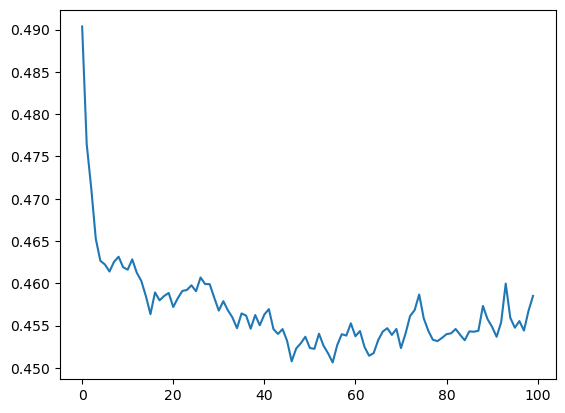

In [76]:
plt.plot(history.history["val_loss"])

# tuning all the hyperparameters in one code

In [127]:
from tensorflow.keras.layers import Dropout

In [102]:
def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers',min_value = 1,max_value = 15)):
        if counter == 0:
            model.add(Dense(hp.Int('units' + str(i),min_value = 8,max_value = 128),
                     activation = hp.Choice('activation' + str(i),values = ['relu','tanh','sigmoid']),
                     input_dim = 8)
                     
                     )
        else:
            
            model.add(Dense(hp.Int('units' + str(i),min_value = 8,max_value = 128),
                     activation = hp.Choice('activation' + str(i),values = ['relu','tanh','sigmoid'])
                     )
                        )
        counter = counter + 1
    model.add(Dense(1,activation = 'sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer' ,values = ['adam','rmsprop','sgd','adadelta']),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy']
                 )
            

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner import HyperParameters

def build_model(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=15)):
        if counter == 0:
            model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128),
                            activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid']),
                            input_dim=8))
            model.add(Dropout(hp.Choice('Dropout' + str(i),values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:
            model.add(Dense(hp.Int('units' + str(i), min_value=8, max_value=128),
                            activation=hp.Choice('activation' + str(i), values=['relu', 'tanh', 'sigmoid'])))
            model.add(Dropout(hp.Choice('Dropout' + str(i),values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        counter += 1
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd', 'adadelta']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model



In [133]:
# building the tuner object
tuner = kt.RandomSearch(build_model,
                        objective= 'val_accuracy',
                        max_trials = 5,
                        directory = 'my_dir1',
                        project_name = 'data2'
                        
                       )

In [134]:
tuner.search(x_train,y_train,epochs = 5,validation_data = (x_test,y_test))

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6948052048683167
Total elapsed time: 00h 00m 08s


In [135]:
tuner.get_best_hyperparameters()

In [136]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5,
 'units0': 80,
 'activation0': 'tanh',
 'Dropout0': 0.1,
 'optimizer': 'sgd',
 'units1': 8,
 'activation1': 'relu',
 'Dropout1': 0.1,
 'units2': 8,
 'activation2': 'relu',
 'Dropout2': 0.1,
 'units3': 8,
 'activation3': 'relu',
 'Dropout3': 0.1,
 'units4': 8,
 'activation4': 'relu',
 'Dropout4': 0.1}

In [122]:
model = tuner.get_best_models(num_models = 1)[0]

In [163]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 500)

Epoch 1/500
20/20 [==============================] - 0s 5ms/step - loss: 0.0462 - accuracy: 0.9870 - val_loss: 1.2268 - val_accuracy: 0.7597
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9951 - val_loss: 1.2603 - val_accuracy: 0.7468
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9951 - val_loss: 1.2760 - val_accuracy: 0.7532
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0252 - accuracy: 0.9967 - val_loss: 1.2977 - val_accuracy: 0.7403
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9967 - val_loss: 1.3287 - val_accuracy: 0.7403
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9967 - val_loss: 1.3515 - val_accuracy: 0.7338
Epoch 7/500
20/20 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9967 - val_loss: 1.3669 - val_accuracy: 0.7403
Epoch 8/500
2

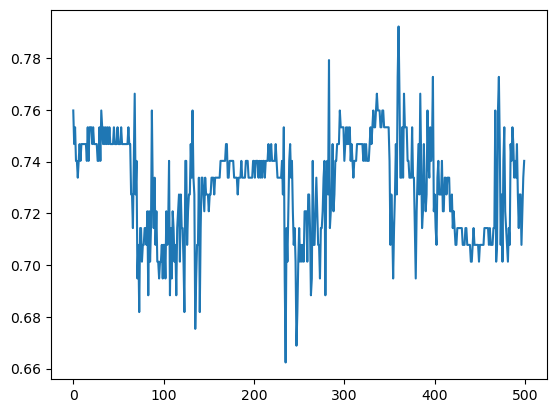

In [164]:
plt.plot(history.history["val_accuracy"])

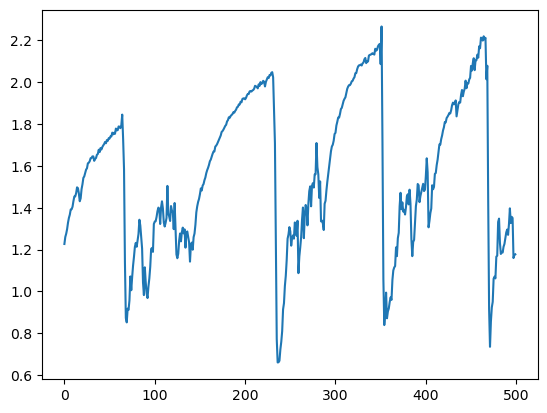

In [165]:
plt.plot(history.history["val_loss"])

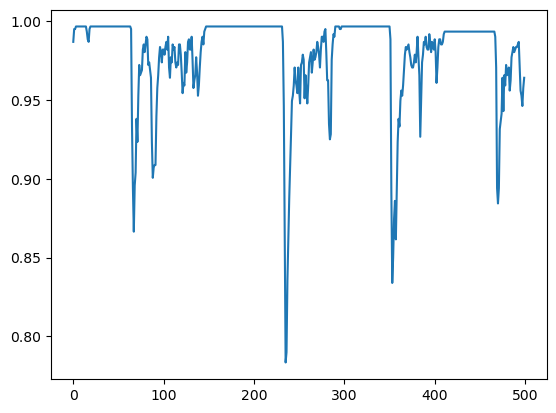

In [166]:
plt.plot(history.history["accuracy"])

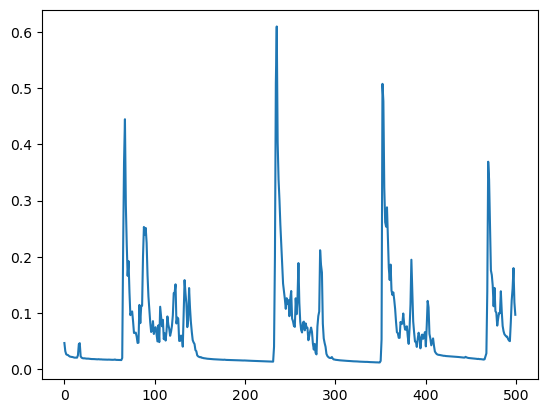

In [167]:
plt.plot(history.history["loss"])

In [154]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 66)                594       
                                                                 
 dense_1 (Dense)             (None, 8)                 536       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 7